In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.listdir('data')

['holidays_events.csv',
 'oil.csv',
 'sample_submission.csv',
 'stores.csv',
 'test.csv',
 'train.csv',
 'transactions.csv']

In [3]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

In [4]:
df_transactions = pd.read_csv('data/transactions.csv')
df_oil = pd.read_csv('data/oil.csv')
df_holidays_events = pd.read_csv('data/holidays_events.csv')
df_stores = pd.read_csv('data/stores.csv')
df_sample_submission = pd.read_csv('data/sample_submission.csv')

In [5]:
df_test

id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE         20.0
1      3000889  2017-08-16          1                   BABY CARE          1.0
2      3000890  2017-08-16          1                      BEAUTY          8.0
3      3000891  2017-08-16          1                   BEVERAGES        560.0
4      3000892  2017-08-16          1                       BOOKS          1.0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY         54.0
28508  3029396  2017-08-31          9              PREPARED FOODS         10.0
28509  3029397  2017-08-31          9                     PRODUCE        302.0
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES         15.0
28511  3029399  2017-08-31          9                     SEAFOOD          8.0

[28512 rows x 5 columns]

In [6]:
df_transactions.head(2)

date  store_nbr  transactions
0  2013-01-01         25           770
1  2013-01-02          1          2111

In [7]:
df_oil.head(2)

date  dcoilwtico
0  2013-01-01         NaN
1  2013-01-02       93.14

In [8]:
df_holidays_events.head(2)
df_holidays_events = df_holidays_events.rename({})

In [9]:
df_stores.head(2)

store_nbr   city      state type  cluster
0          1  Quito  Pichincha    D       13
1          2  Quito  Pichincha    D       13

In [10]:
df_sample_submission.head(2)

id  sales
0  3000888    0.0
1  3000889    0.0

In [11]:
df_train.head(2)

id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01          1  AUTOMOTIVE    0.0          0.0
1   1  2013-01-01          1   BABY CARE    0.0          0.0

In [12]:
full_data = pd.DataFrame()
full_data = df_train.merge(df_transactions, how = 'left', on = ['date', 'store_nbr'])
full_data = full_data.merge(df_oil, how = 'left', on = 'date')
full_data = full_data.merge(df_holidays_events, how = 'left', on = 'date')
full_data = full_data.merge(df_stores,  how = 'left', on = 'store_nbr')
full_data = full_data.rename({'type_x':'type_holiday', 'type_y':'type_store'}, axis = 1)

In [13]:
full_data.describe()

id     store_nbr         sales   onpromotion  transactions  \
count  3.054348e+06  3.054348e+06  3.054348e+06  3.054348e+06  2.805231e+06   
mean   1.504277e+06  2.750000e+01  3.590209e+02  3.473166e+01  1.697071e+03   
std    8.662610e+05  1.558579e+01  1.107286e+03  9.968402e+01  9.668317e+02   
min    0.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  5.000000e+00   
25%    7.546768e+05  1.400000e+01  0.000000e+00  0.000000e+00  1.046000e+03   
50%    1.507572e+06  2.750000e+01  1.100000e+01  1.000000e+00  1.395000e+03   
75%    2.255120e+06  4.100000e+01  1.960110e+02  1.600000e+01  2.081000e+03   
max    3.000887e+06  5.400000e+01  1.247170e+05  1.006000e+03  8.359000e+03   

         dcoilwtico       cluster  
count  2.099196e+06  3.054348e+06  
mean   6.801587e+01  8.481481e+00  
std    2.569134e+01  4.649735e+00  
min    2.619000e+01  1.000000e+00  
25%    4.641000e+01  4.000000e+00  
50%    5.343000e+01  8.500000e+00  
75%    9.581000e+01  1.300000e+01  
max    1.106200e+02  1.700000e+01

In [14]:
prepare_data = full_data.dropna(subset = ['transactions','dcoilwtico'], axis = 0)
prepare_data = prepare_data.reset_index(drop = True)

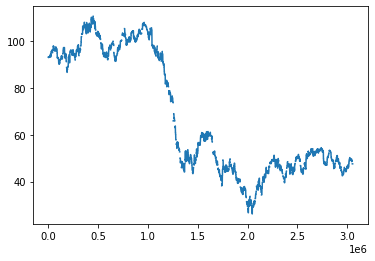

In [15]:
plt.plot(full_data['dcoilwtico'])
plt.show()

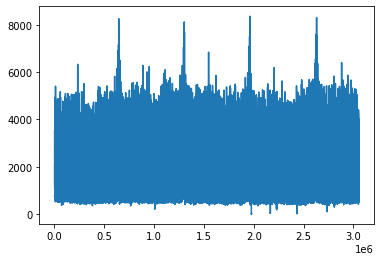

In [16]:
plt.plot(full_data.transactions)
plt.show()

In [17]:
prepare_data = prepare_data.dropna(subset = ['type_holiday', 'locale', 'locale_name', 'description', 'transferred'], axis = 0)
prepare_data = prepare_data.reset_index(drop = True)


In [18]:
categorical_columns = [c for c in prepare_data.columns if prepare_data[c].dtype.name == 'object']
numerical_columns   = [c for c in prepare_data.columns if prepare_data[c].dtype.name != 'object']

In [19]:
prepare_data[categorical_columns].describe()

date      family type_holiday    locale locale_name description  \
count       300003      300003       300003    300003      300003      300003   
unique         166          33            5         3          24          77   
top     2014-06-25  AUTOMOTIVE      Holiday  National     Ecuador    Carnaval   
freq          6204        9091       185823    147279      147279       14751   

       transferred    city      state type_store  
count       300003  300003     300003     300003  
unique           2      22         16          5  
top          False   Quito  Pichincha          D  
freq        286308  104610     110583     102597

In [20]:
prepare_data[numerical_columns].describe()

id      store_nbr          sales    onpromotion  \
count  3.000030e+05  300003.000000  300003.000000  300003.000000   
mean   1.654259e+06      26.987900     403.274688      41.868248   
std    7.824847e+05      15.599712    1242.566183     107.049810   
min    7.306200e+04       1.000000       0.000000       0.000000   
25%    9.848105e+05      13.000000       1.000000       0.000000   
50%    1.841086e+06      27.000000      19.000000       4.000000   
75%    2.188370e+06      40.000000     240.000000      28.000000   
max    3.000887e+06      54.000000  124717.000000     980.000000   

        transactions     dcoilwtico        cluster  
count  300003.000000  300003.000000  300003.000000  
mean     1735.247608      64.077912       8.532835  
std      1051.995736      25.147682       4.714528  
min        54.000000      27.960000       1.000000  
25%      1033.000000      44.660000       4.000000  
50%      1413.000000      51.440000       9.000000  
75%      2152.000000      94.740000      13.000000  
max      8359.000000     107.950000      17.000000

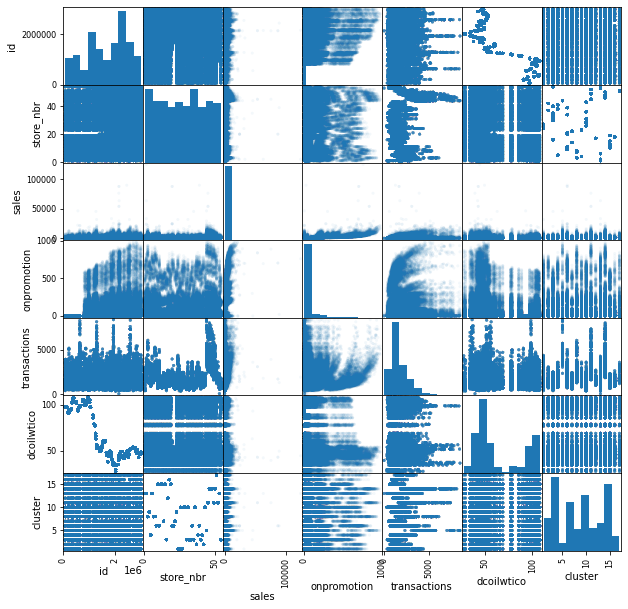

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(prepare_data[numerical_columns], alpha=0.05, figsize=(10, 10));

In [22]:
prepare_data.corr()

id  store_nbr     sales  onpromotion  transactions  \
id            1.000000   0.013995  0.060019     0.164677     -0.021041   
store_nbr     0.013995   1.000000  0.050281     0.015189      0.167187   
sales         0.060019   0.050281  1.000000     0.743438      0.201211   
onpromotion   0.164677   0.015189  0.743438     1.000000      0.074481   
transactions -0.021041   0.167187  0.201211     0.074481      1.000000   
dcoilwtico   -0.836786  -0.010286 -0.062568    -0.148908     -0.017944   
cluster      -0.019533  -0.076238  0.033491     0.015629      0.188730   

              dcoilwtico   cluster  
id             -0.836786 -0.019533  
store_nbr      -0.010286 -0.076238  
sales          -0.062568  0.033491  
onpromotion    -0.148908  0.015629  
transactions   -0.017944  0.188730  
dcoilwtico      1.000000  0.021655  
cluster         0.021655  1.000000

In [23]:
len(set(prepare_data['store_nbr'].values))

54

In [24]:
prepare_data['store_nbr'].value_counts()

1     5973
47    5973
38    5973
10    5973
4     5973
40    5973
41    5973
43    5973
44    5973
45    5973
46    5973
48    5973
35    5973
49    5973
5     5973
50    5973
51    5973
54    5973
6     5973
7     5973
8     5973
9     5973
37    5973
39    5973
34    5973
23    5973
11    5973
13    5973
15    5973
16    5973
33    5973
19    5973
2     5973
17    5973
26    5973
27    5973
28    5973
3     5973
31    5973
32    5973
14    5907
30    5874
25    5874
12    5808
36    5775
18    5577
24    5379
53    4752
20    3465
29    3399
21    3069
42    2970
22    2871
52     363
Name: store_nbr, dtype: int64

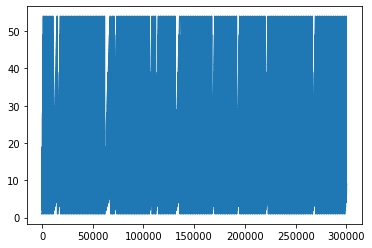

In [25]:
plt.plot(prepare_data.store_nbr)
plt.show()

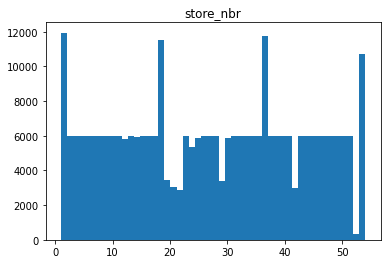

-------------


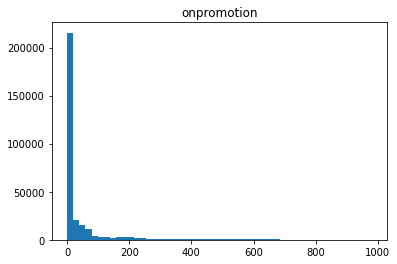

-------------


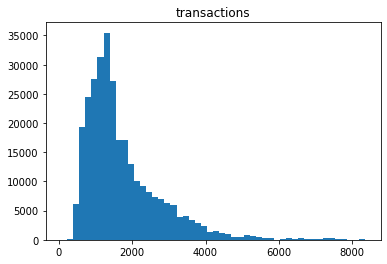

-------------


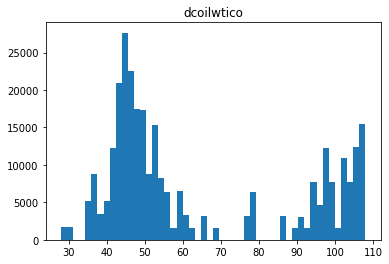

-------------


In [26]:


for feature_name in ['store_nbr', 'onpromotion', 'transactions', 'dcoilwtico']:
    bins = 50
    plt.title(feature_name)
    plt.hist(prepare_data[feature_name], bins)

    plt.show()
    print('-------------')

In [27]:
numerical_features = ['onpromotion', 'transactions', 'dcoilwtico']
binary_features = ['transferred']
nonbinary_features = ['family', 'type_holiday', 'locale', 'locale_name', 'description',  'city', 'state', 'type_store']

In [28]:
prepare_data.columns

Index(['id', 'date', 'store_nbr', 'family', 'sales', 'onpromotion',
       'transactions', 'dcoilwtico', 'type_holiday', 'locale', 'locale_name',
       'description', 'transferred', 'city', 'state', 'type_store', 'cluster'],
      dtype='object')

In [29]:
data_numerical = prepare_data[numerical_features]

In [30]:
data_binary = prepare_data[binary_features]
data_binary['transferred'][data_binary['transferred'] == False] = 0
data_binary['transferred'][data_binary['transferred'] == True] = 1

D:\Anaconda\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [31]:
prepare_data[['family']]

family
0                       AUTOMOTIVE
1                        BABY CARE
2                           BEAUTY
3                        BEVERAGES
4                            BOOKS
...                            ...
299998                     POULTRY
299999              PREPARED FOODS
300000                     PRODUCE
300001  SCHOOL AND OFFICE SUPPLIES
300002                     SEAFOOD

[300003 rows x 1 columns]

In [32]:
pd.get_dummies(prepare_data['family'])

AUTOMOTIVE  BABY CARE  BEAUTY  BEVERAGES  BOOKS  BREAD/BAKERY  \
0                1          0       0          0      0             0   
1                0          1       0          0      0             0   
2                0          0       1          0      0             0   
3                0          0       0          1      0             0   
4                0          0       0          0      1             0   
...            ...        ...     ...        ...    ...           ...   
299998           0          0       0          0      0             0   
299999           0          0       0          0      0             0   
300000           0          0       0          0      0             0   
300001           0          0       0          0      0             0   
300002           0          0       0          0      0             0   

        CELEBRATION  CLEANING  DAIRY  DELI  ...  MAGAZINES  MEATS  \
0                 0         0      0     0  ...          0      0   
1                 0         0      0     0  ...          0      0   
2                 0         0      0     0  ...          0      0   
3                 0         0      0     0  ...          0      0   
4                 0         0      0     0  ...          0      0   
...             ...       ...    ...   ...  ...        ...    ...   
299998            0         0      0     0  ...          0      0   
299999            0         0      0     0  ...          0      0   
300000            0         0      0     0  ...          0      0   
300001            0         0      0     0  ...          0      0   
300002            0         0      0     0  ...          0      0   

        PERSONAL CARE  PET SUPPLIES  PLAYERS AND ELECTRONICS  POULTRY  \
0                   0             0                        0        0   
1                   0             0                        0        0   
2                   0             0                        0        0   
3                   0             0                        0        0   
4                   0             0                        0        0   
...               ...           ...                      ...      ...   
299998              0             0                        0        1   
299999              0             0                        0        0   
300000              0             0                        0        0   
300001              0             0                        0        0   
300002              0             0                        0        0   

        PREPARED FOODS  PRODUCE  SCHOOL AND OFFICE SUPPLIES  SEAFOOD  
0                    0        0                           0        0  
1                    0        0                           0        0  
2                    0        0                           0        0  
3                    0        0                           0        0  
4                    0        0                           0        0  
...                ...      ...                         ...      ...  
299998               0        0                           0        0  
299999               1        0                           0        0  
300000               0        1                           0        0  
300001               0        0                           1        0  
300002               0        0                           0        1  

[300003 rows x 33 columns]

In [33]:
data_nonbinary = pd.DataFrame()
for i in nonbinary_features:
    data_nonbinary = pd.concat((data_nonbinary, pd.get_dummies(prepare_data[i])), axis = 1)

In [34]:
sales_data = prepare_data['sales'].copy()
MAX_value = sales_data.max()
MIN_value = sales_data.min()
marks_value = (sales_data-MIN_value)/(MAX_value-MIN_value)

In [35]:

MAX_value = data_numerical.max()
MIN_value = data_numerical.min()

data_numerical = (data_numerical-MIN_value)/(MAX_value-MIN_value)


In [36]:
final_test_data = pd.concat((data_binary, data_numerical, data_nonbinary), axis = 1)

In [37]:
X_data = final_test_data[[ 'onpromotion', 
       'AUTOMOTIVE', 'BABY CARE', 'BEAUTY', 'BEVERAGES', 'BOOKS',
       'BREAD/BAKERY', 'CELEBRATION', 'CLEANING', 'DAIRY', 'DELI', 'EGGS',
       'FROZEN FOODS', 'GROCERY I', 'GROCERY II', 'HARDWARE',
       'HOME AND KITCHEN I', 'HOME AND KITCHEN II', 'HOME APPLIANCES',
       'HOME CARE', 'LADIESWEAR', 'LAWN AND GARDEN', 'LINGERIE',
       'LIQUOR,WINE,BEER', 'MAGAZINES', 'MEATS', 'PERSONAL CARE',
       'PET SUPPLIES', 'PLAYERS AND ELECTRONICS', 'POULTRY', 'PREPARED FOODS',
       'PRODUCE', 'SCHOOL AND OFFICE SUPPLIES', 'SEAFOOD', 'Holiday', 'Local',
       'Ambato', 'Fundacion de Ambato', 'Ambato', 'Babahoyo', 'Cayambe',
       'Cuenca', 'Daule', 'El Carmen', 'Esmeraldas', 'Guaranda', 'Guayaquil',
       'Ibarra', 'Latacunga', 'Libertad', 'Loja', 'Machala', 'Manta', 'Playas',
       'Puyo', 'Quevedo', 'Quito', 'Riobamba', 'Salinas', 'Santo Domingo',
       'Azuay', 'Bolivar', 'Chimborazo', 'Cotopaxi', 'El Oro', 'Esmeraldas',
       'Guayas', 'Imbabura', 'Loja', 'Los Rios', 'Manabi', 'Pastaza',
       'Pichincha', 'Santa Elena', 'Santo Domingo de los Tsachilas',
       'Tungurahua', 'A', 'B', 'C', 'D', 'E']]

In [38]:
X_data = X_data.loc[:,~X_data.columns.duplicated()]

In [39]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor, LinearRegression
from sklearn.metrics import mean_absolute_error, max_error, mean_squared_error
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.metrics import mean_squared_log_error

In [40]:
def get_accuracy_metrics(y_test, y_train, y_pred_test, y_pred_train):
    # Чем меньше, тем лучше
    print ('MAE_test', mean_absolute_error(y_test, y_pred_test))
    print ('MAE_train', mean_absolute_error(y_train, y_pred_train))
    print ('RMSE_test', mean_squared_error(y_test, y_pred_test, squared = False))
    print ('RMSE_train', mean_squared_error(y_train, y_pred_train, squared = False))


In [41]:
X_train = X_data[:210000]
X_test = X_data[210000:]
y_train = marks_value.values[:210000]
y_test = marks_value.values[210000:]

In [50]:
mdl = LinearRegression()
mdl.fit(X_train.values, y_train)
y_pred_test = mdl.predict(X_test.values)

In [51]:
y_test

array([1.44326756e-04, 1.36308603e-04, 8.01815310e-06, ...,
       1.94017576e-02, 9.70196525e-04, 1.28290450e-04])

In [52]:
y_pred_test

array([3.89575958e-04, 8.34941864e-04, 8.39233398e-05, ...,
       1.44739151e-02, 4.75883484e-04, 1.59263611e-04])

In [53]:
for i in [Ridge(), Lasso(), SGDRegressor()]:
    try:
        print(str(i))
        i.fit(X_train, y_train)
        y_pred_train = i.predict(X_train)
        y_pred_test = i.predict(X_test)
        print(mean_squared_log_error(y_pred_test, y_test))
        print(mean_squared_log_error(y_pred_train, y_train))
    except:
        None
    
    

Ridge()
Lasso()
0.00010111145901789466
8.363070325327167e-05
SGDRegressor()


In [54]:
data

NameError: name 'data' is not defined

In [55]:
# onpromotion и sales очень высокий коэффициент корреляции !!!!

In [56]:
# может быть для признаков transactions и dcoilwtico
# следует применить линейную регрессию для восстановления пропущенных значений

In [57]:
# может быть для признаков type_holiday, locale, locale_name, description, transferred
# следует применить классификатор для восстановления пропущенных значений

In [58]:
# store_nbr - категориальный небинарный признак
# store_nbr, возможно следует удалить

In [59]:
import pickle
with open('mdl.pkl', 'wb') as file:  
    pickle.dump(mdl, file)

In [ ]:
final_test_data.shape

In [ ]:
final_test_data.columns